## Sprint 8. Algoritmes d’aprenentatge No supervisat, Agrupació.

### Exercici 1
#### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

#### Carga y análisis del dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_F_TLD = pd.read_csv("C:\IT Academy\Sprint 8 Algoritmes de Aprendizaje NO supervisado Agrupación\Publicacions Facebook Thailandia.csv")

In [3]:
df_F_TLD.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df_F_TLD.shape

(7050, 16)

In [5]:
# buscamos registros vacíos
df_F_TLD.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
# eliminamos las columnas vacías
df_F_TLD = df_F_TLD.drop(['Column1', 'Column2', 'Column3','Column4'], axis=1)
df_F_TLD.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
# buscamos registros nulos
df_F_TLD.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [8]:
# borramos los registros duplicados
df_F_TLD = df_F_TLD.drop_duplicates(subset = ['status_id'], ignore_index=True)

In [9]:
df_F_TLD.shape

(6997, 12)

In [10]:
df_F_TLD.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

#### Descrición de la base de datos.
Nuestro dataset recoge el comportamiento de los usuarios de Facebook en Tailandia entre los años 2012 y 2018. Es una base de datos estructurada relacional con 6997 registros y doce variables. La variables son categóricas tres de ellas, de las cuales una es ordinal y otra temporal, y nueve numéricas discretas.

#### Transformación del dataset.

#### Variable temporal 'status_published'.
Tenemos una variable categórica de la que podemos obtener variables temporales que nos aportarían información para el  analisis como los meses, los años, las horas, con las que etiquetar partes del día, estaciones del año, eventos puntuales, etc...

In [11]:
from datetime import datetime

df_F_TLD['publication_date'] = [None] * len(df_F_TLD['status_published'])

for i in range(len(df_F_TLD['status_published'])):
    df_F_TLD['publication_date'][i] = datetime.strptime(df_F_TLD['status_published'][i], '%m/%d/%Y %H:%M')

In [12]:
df_F_TLD['year'] = [None] * len(df_F_TLD['status_published'])
df_F_TLD['month'] = [None] * len(df_F_TLD['status_published'])
df_F_TLD['hour'] = [None] * len(df_F_TLD['status_published'])
for i in range(len(df_F_TLD['status_published'])):
    date = df_F_TLD['publication_date'][i]
    df_F_TLD['year'][i] = date.strftime('%Y')
    df_F_TLD['month'][i] = date.strftime('%m')
    df_F_TLD['hour'][i] = date.strftime('%H:%M')

In [13]:
# eliminamos la variable original
df_F_TLD = df_F_TLD.drop('status_published', axis=1)

#### Variable temporal 'hour', partes del día.  
Transformamos las horas en una variable numérica categórica: mañana, tarde, noche, madrugada.
En Tailandia amanece muy pronto (6.00 - 6.30) y oscurece también muy pronto (18.00 - 18.30), suelen comer y cenar en horario europeo (12.30 / 19.00, más o menos), nos guiamos por estos datos para configurar las partes del día.

In [14]:
# añadimos una variable al dataset
df_F_TLD['part_day'] = 'Manaña 06-12h'
# filtramos por horas y damos valores
df_F_TLD.loc[(df_F_TLD['hour']>= '00:00') & (df_F_TLD['hour']< '06:00'), 'part_day'] = 'Madrugada 00-06h'
df_F_TLD.loc[(df_F_TLD['hour']>= '12:00') & (df_F_TLD['hour']< '20:00'), 'part_day'] = 'Tarde 12-20h'
df_F_TLD.loc[(df_F_TLD['hour']>= '20:00') & (df_F_TLD['hour']< '23:59'), 'part_day'] = 'Noche 20-00h'

In [15]:
df_F_TLD['part_day'].value_counts()

Madrugada 00-06h    2973
Manaña 06-12h       2764
Noche 20-00h        1062
Tarde 12-20h         198
Name: part_day, dtype: int64

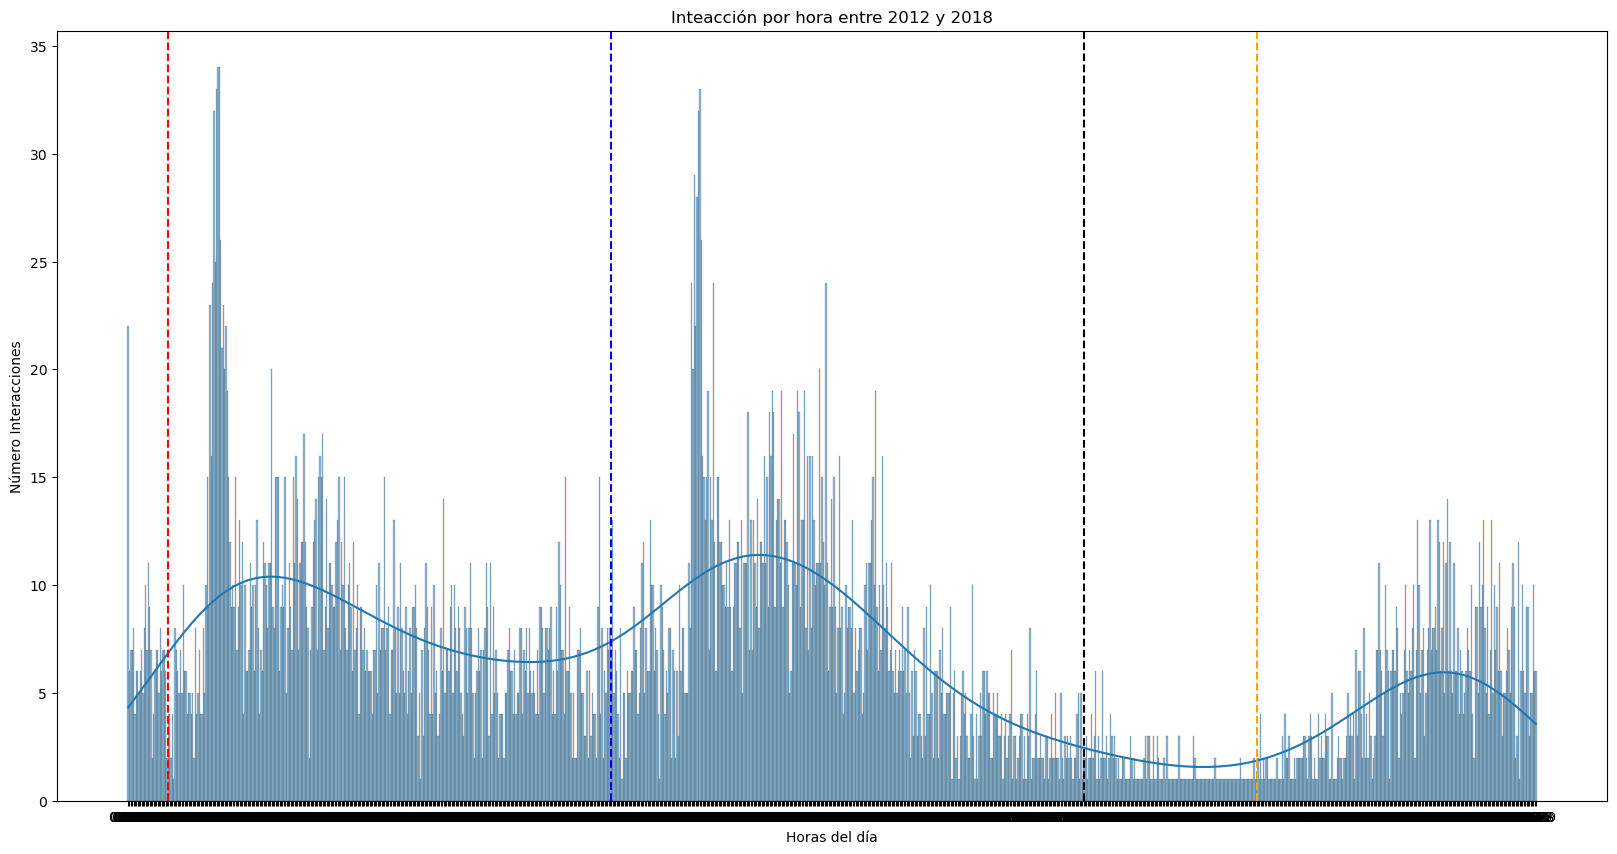

In [16]:
df_F_TLD = df_F_TLD.sort_values(by=['hour'])

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(df_F_TLD['hour'], kde=True)
plt.axvline(x = '00:30', color = 'red', linestyle = '--')
plt.axvline(x = '06:00', color = 'blue', linestyle = '--')
plt.axvline(x = '12:00', color = 'black', linestyle = '--')
plt.axvline(x = '20:00', color = 'orange', linestyle = '--')
plt.xlabel('Horas del día')
plt.ylabel('Número Interacciones')
plt.title('Inteacción por hora entre 2012 y 2018');

Podemos observar que los usuarios están muy activos durante la madrugada, seis horas, y la mañana, seis horas. Durante las cuatro horas del periodo de noche interaccionan la mitad, y a lo largo de la tarde, ocho horas, apenas interaccionan.

In [17]:
# transformamos a una variable dummie
df_F_TLD['part_day_dum'] = df_F_TLD['part_day'].map({'Manaña 06-12h':0, 'Tarde 12-20h':1, 'Noche 20-00h':2, 'Madrugada 00-06h':3})

#### Variable 'status_type' , tipo de interacción con la red.
Pasamos esta variable categórica a numérica categórica.

In [18]:
df_F_TLD['status_type'].unique()

array(['video', 'photo', 'status', 'link'], dtype=object)

In [19]:
df_F_TLD['status_type'].value_counts()

photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64

In [20]:
df_F_TLD['status_type_dum'] = df_F_TLD['status_type'].map({'video':0, 'photo':1, 'status':2, 'link':3})

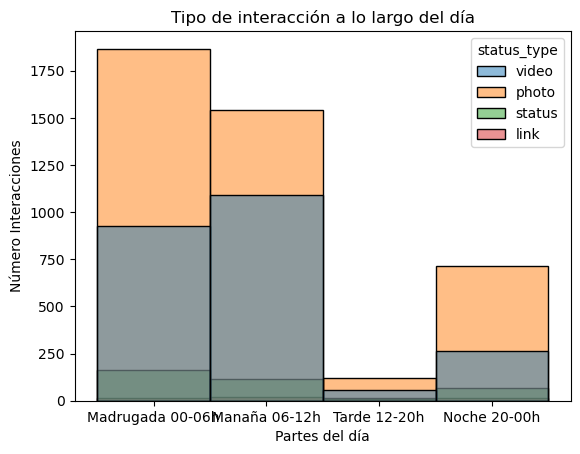

In [21]:
sns.histplot(x=df_F_TLD['part_day'], hue=df_F_TLD['status_type'])
plt.xlabel('Partes del día')
plt.ylabel('Número Interacciones')
plt.title('Tipo de interacción a lo largo del día');

Los usuarios interaccionan principalmente con fotos y vídeos, siendo las fotos casi el doble que los vídeos. No llega al 10% los ususarios que comparten su estatus, y el número de links compartidos no llega al 1%.

#### Preparación del dataset.

In [22]:
df_F_TLD.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'publication_date', 'year', 'month', 'hour',
       'part_day', 'part_day_dum', 'status_type_dum'],
      dtype='object')

In [23]:
# reordenamos las columnas
df_F_TLD = df_F_TLD.reindex(columns=['status_type', 'status_type_dum', 'part_day',
       'part_day_dum', 'publication_date',
       'month', 'year', 'hour', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys','status_id'])

In [24]:
# ordenamos por fecha
df_F_TLD = df_F_TLD.sort_values(by=['publication_date']).reset_index(drop=True, inplace=False)
df_F_TLD.head()

,status_type,status_type_dum,part_day,part_day_dum,publication_date,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_id
0,photo,1,Madrugada 00-06h,3,2012-07-15 02:51:00,07,2012,02:51,15,3,0,15,0,0,0,0,0,246675545449582_246677465449390
1,photo,1,Madrugada 00-06h,3,2012-07-15 02:58:00,07,2012,02:58,14,7,0,14,0,0,0,0,0,246675545449582_246678538782616
2,photo,1,Madrugada 00-06h,3,2012-07-15 03:32:00,07,2012,03:32,14,1,0,14,0,0,0,0,0,246675545449582_246684432115360
3,photo,1,Madrugada 00-06h,3,2012-07-15 03:42:00,07,2012,03:42,12,3,0,12,0,0,0,0,0,246675545449582_246686478781822
4,photo,1,Madrugada 00-06h,3,2012-07-15 03:54:00,07,2012,03:54,19,17,3,19,0,0,0,0,0,246675545449582_246688625448274


#### Dataset con el vamos a trabajar.

In [25]:
df_F_TLD.shape

(6997, 18)

In [26]:
df_F_TLD.dtypes

status_type         object
status_type_dum      int64
part_day            object
part_day_dum         int64
publication_date    object
month               object
year                object
hour                object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
status_id           object
dtype: object

In [27]:
df_F_TLD.describe().round(2)

,status_type_dum,part_day_dum,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.00,6997.00,6997.00,6997.00,6997.00,6997.0,6997.00,6997.00,6997.00,6997.00,6997.00
mean,0.74,1.61,224.95,225.61,40.27,209.9,12.76,1.25,0.70,0.23,0.11
std,0.59,1.37,452.93,892.86,132.06,439.6,40.11,8.73,3.97,1.48,0.69
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,17.00,0.00,0.00,17.0,0.00,0.00,0.00,0.00,0.00
50%,1.00,2.00,58.00,4.00,0.00,57.0,0.00,0.00,0.00,0.00,0.00
75%,1.00,3.00,216.00,22.00,4.00,182.0,3.00,0.00,0.00,0.00,0.00
max,3.00,3.00,4710.00,20990.00,3424.00,4710.0,657.00,278.00,157.00,51.00,31.00


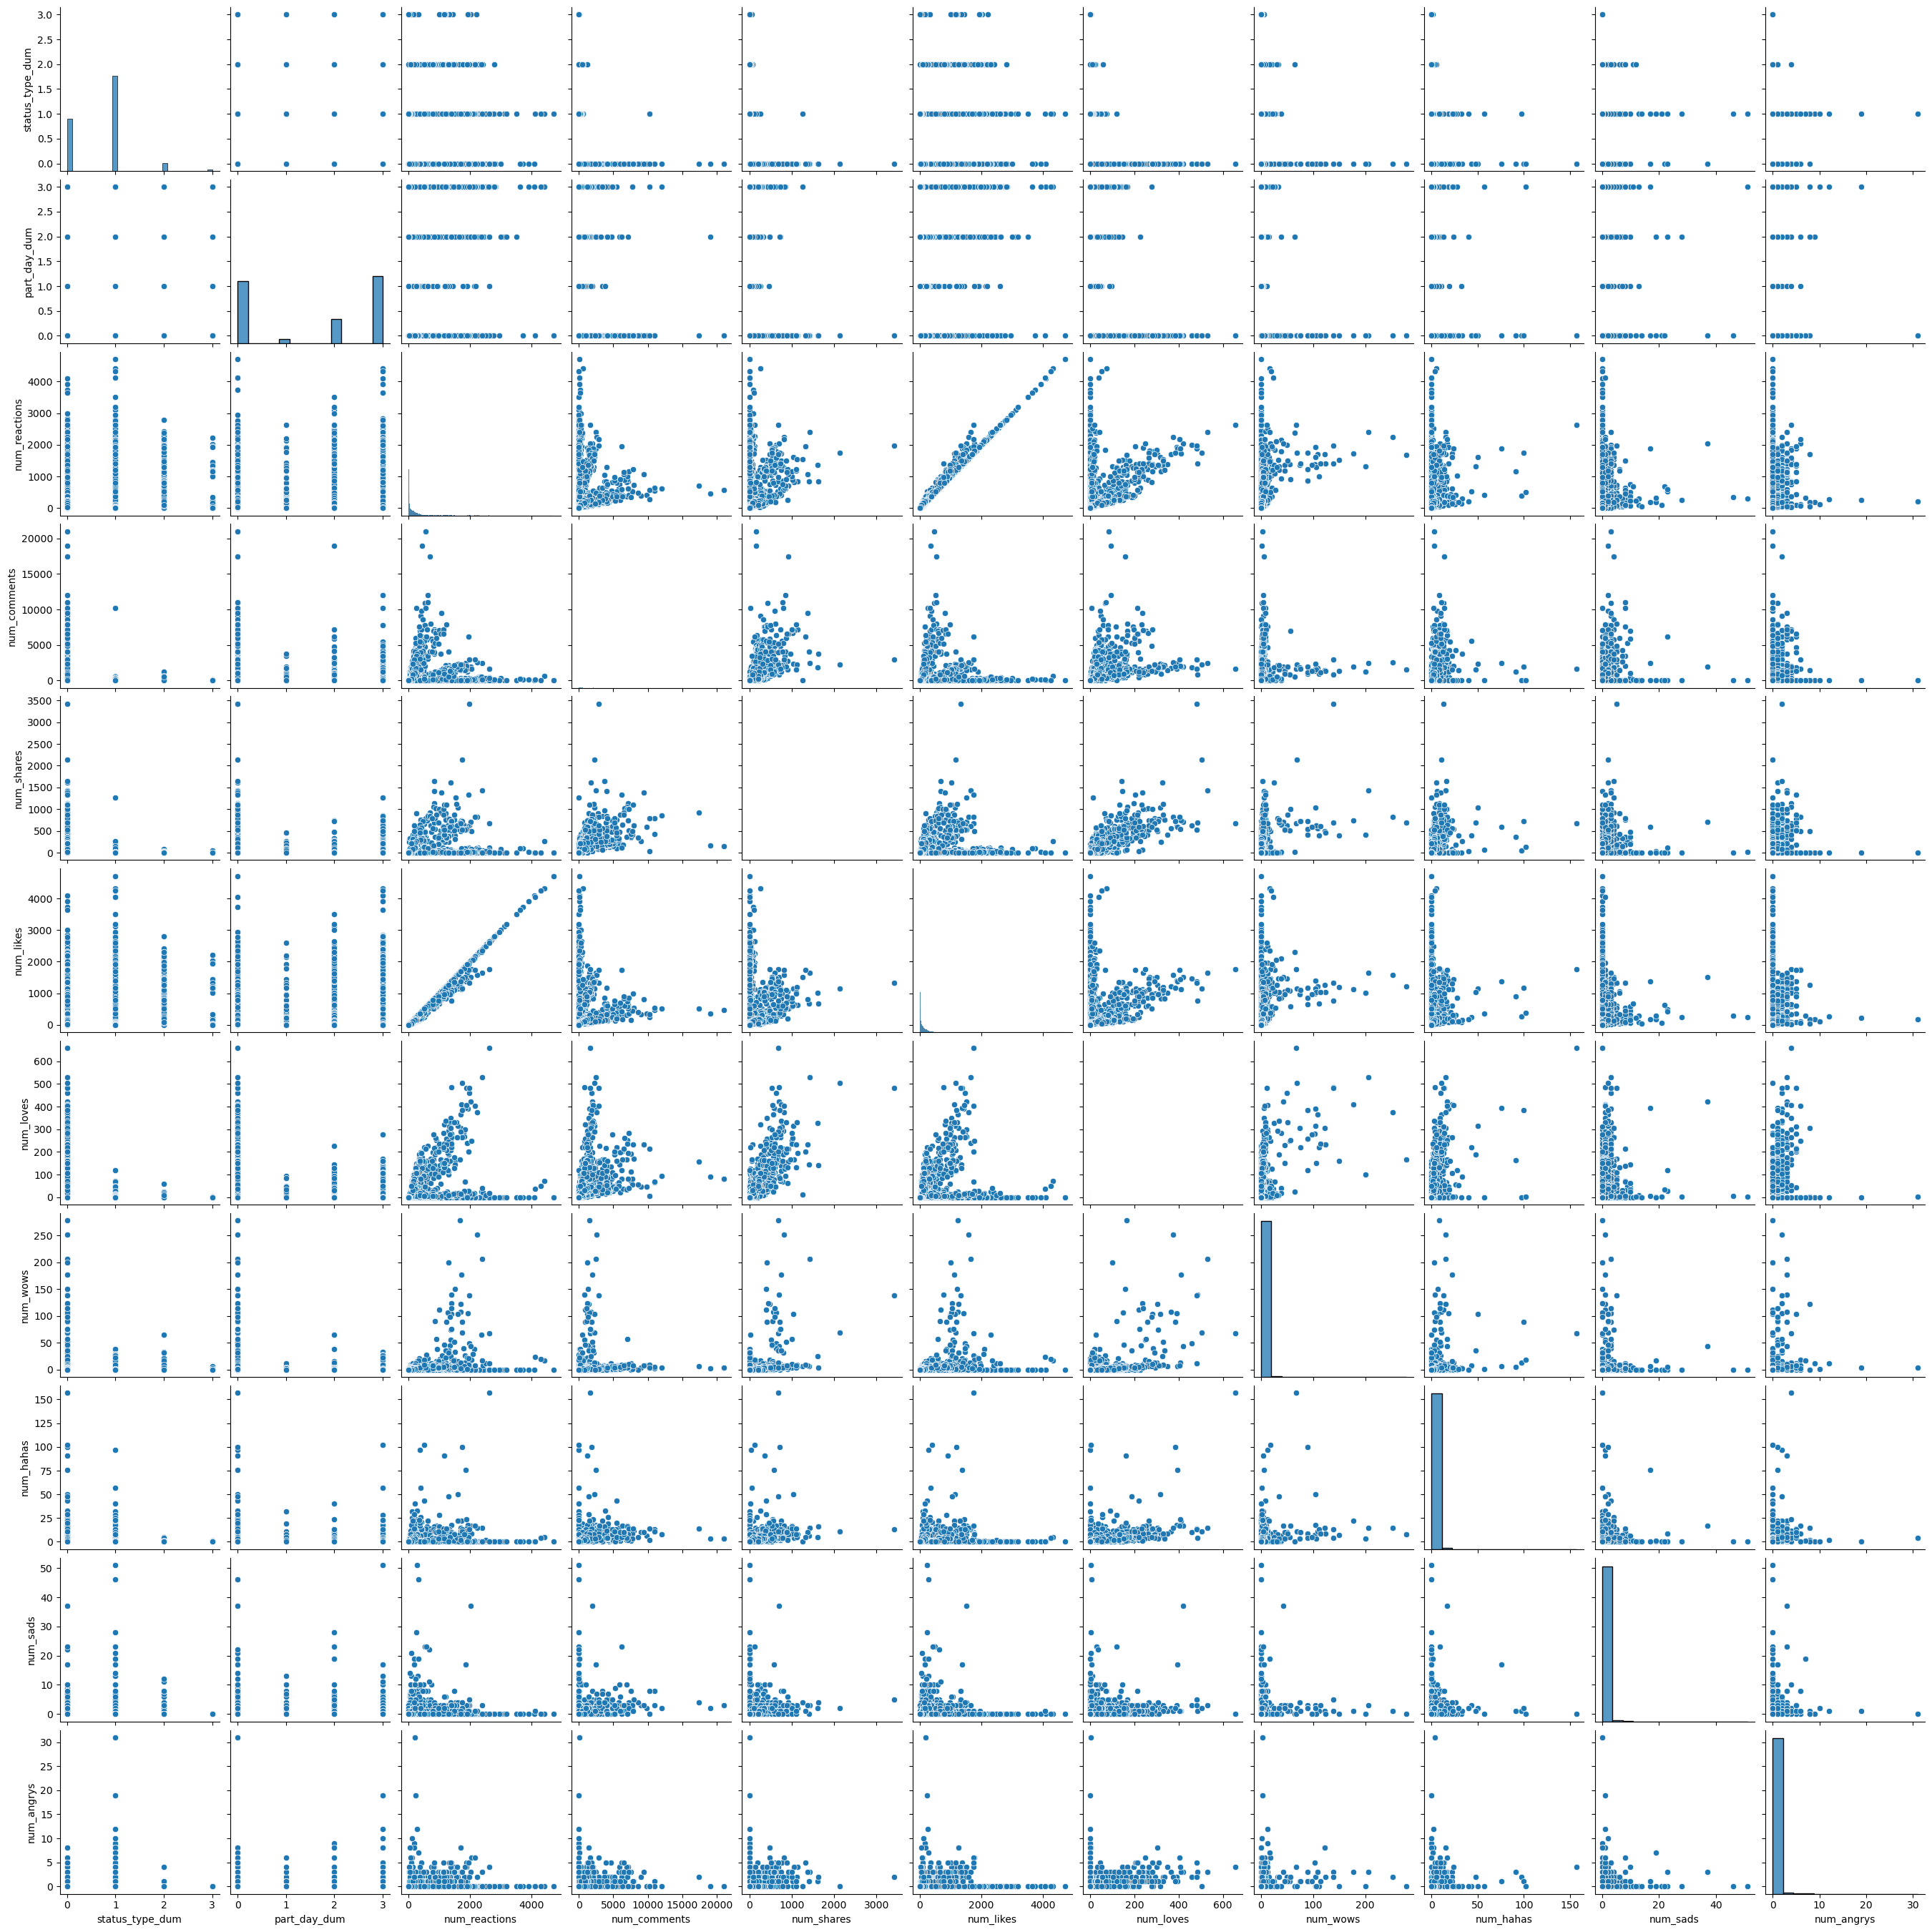

In [28]:
sns.pairplot(df_F_TLD);

#### Análisis descriptivo.  
Vemos que las desviaciones estandart de las variables son altas o muy altas, lo que significa que las distribuciones están muy sesgadas y que tienen outliers. Entendemos que son datos acordes a un comportamiento en una red social donde podemos encontrar reacciones virales que se reflejan así en las estadísticas.  
Las gráficas muestran relaciones lineales entre variables que deberemos controlar.

### Clasificación de los registros utilizando el algoritmo de K-Means.

K-Means es un algoritmo de apredizaje no supervisado de agrupamiento, construye grupos de datos sin etiquetas previas dividiendo los registros en 'k' grupos en función de la distacia de cada registro a los centroides y minimiza la suma de los cuadrados de estas distancias en cada grupo. 

#### El objetivo de trabajar con este algoritmo de agrupación es encontrar patrones y extraer conclusiones sobre el motivo de estas agrupaciones.

#### Analizamos la relación entre variables.

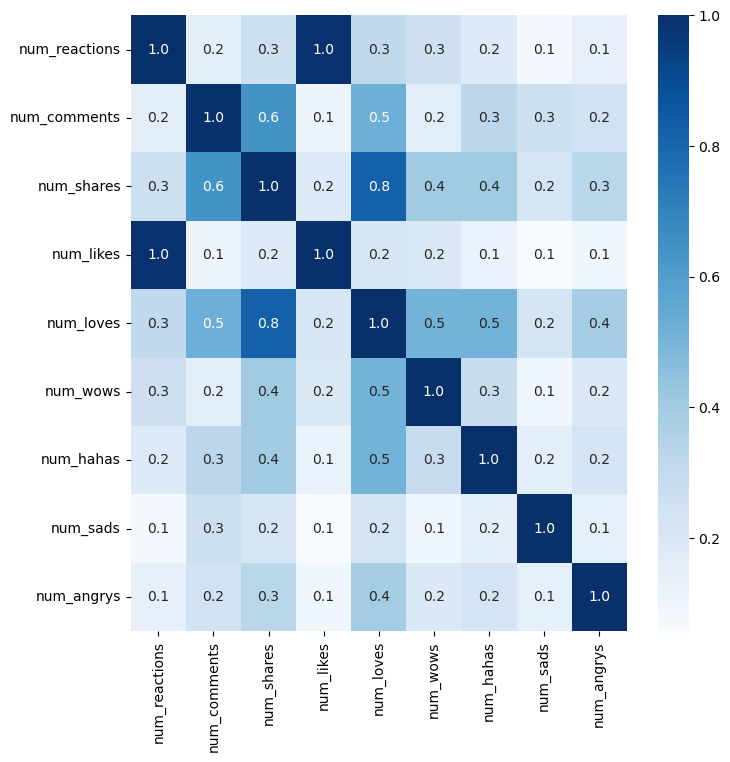

In [29]:
# vemos la matriz de correlación
col_corr = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
correlation_matrix = df_F_TLD[col_corr].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues');

In [30]:
df_F_TLD[['num_shares','num_comments','num_reactions','num_likes','num_loves','num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sample(10)

,num_shares,num_comments,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6007,0,0,51,51,0,0,0,0,0
5795,4,0,95,88,0,0,7,0,0
3331,0,0,1,1,0,0,0,0,0
4514,0,24,132,131,0,1,0,0,0
901,0,0,10,10,0,0,0,0,0
1900,2,19,111,110,1,0,0,0,0
2699,0,3,176,175,0,1,0,0,0
460,0,11,31,31,0,0,0,0,0
6812,0,1,12,12,0,0,0,0,0
3060,0,8,79,79,0,0,0,0,0


El número de reacciones el es número de likes, loves, wows, hahas, sads y angrys sumados. Para el algoritmo, en este ejercicio, tendremos en cuenta sólo la variable 'num_reactions' y no 'num_likes','num_loves','num_wows', 'num_hahas', 'num_sads' y 'num_angrys'.

Vamos a hacer una nueva variable que represente todas las reacciones que suscita una publicación juntas para simplificar el estudio.

In [31]:
df_F_TLD['num_interacciones'] = df_F_TLD['num_shares'] + df_F_TLD['num_comments'] + df_F_TLD['num_reactions']

#### Preprocesado de las variables numéricas con MinMaxScaler.  
El algotirmo K-Means se basa en el cálculo de distancias y necesita tener todas las variables en la misma escala para ser válido.

In [32]:
from sklearn.preprocessing import MinMaxScaler

df_min_max = df_F_TLD.copy()

variables_num = ['status_type_dum', 'part_day_dum', 'num_interacciones', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

mms = MinMaxScaler(feature_range=(0, 1))
df_min_max[variables_num] = mms.fit_transform(df_min_max[variables_num])

#### Análisis de componentes principales PCA.  
Técnica para reducir dimensiones reteniendo toda la información posible.

In [33]:
from sklearn.decomposition import PCA
variables_num = [df_min_max['status_type_dum'], df_min_max['part_day_dum'], df_min_max['num_interacciones'], df_min_max['num_reactions'], df_min_max['num_comments'], df_min_max['num_shares']]

In [34]:
pca = PCA(random_state=0)

In [35]:
calculo_pca = pca.fit_transform(variables_num)

In [36]:
PC_components = np.arange(pca.n_components_) + 1
print(PC_components)

[1 2 3 4 5 6]


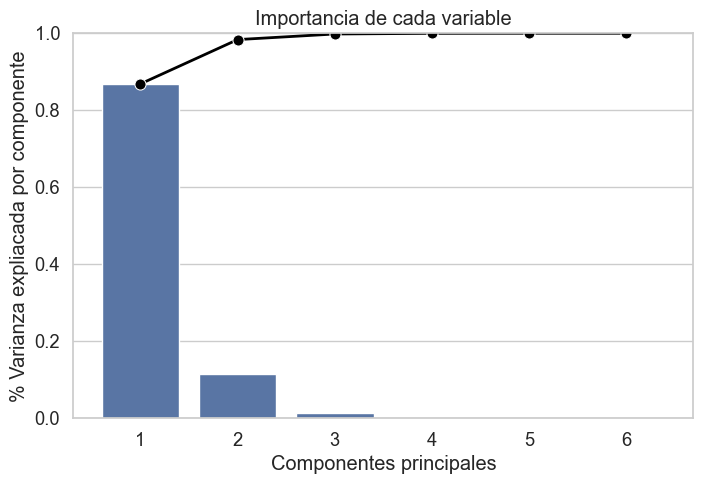

In [37]:
calculo_pca = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 5))
calculo_pca = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
calculo_pca = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Importancia de cada variable')
plt.xlabel('Componentes principales')
plt.ylabel('% Varianza expliacada por componente')
plt.ylim(0, 1);

In [38]:
print(pca.explained_variance_ratio_)

[8.68446605e-01 1.15071603e-01 1.45179908e-02 1.76441483e-03
 1.99386205e-04 6.56575106e-32]


Con las dos primeras variables explicamos más de un 98% de los datos, sólo usaremos estas variables 'status_type_dum', 'part_day_dum', para trabajar con los algoritmos.

#### Técnica de Elbow.
El objetivo del algoritmo K_Means es encontrar las mejores agrupaciones para los datos dados.  
El tipo de distancia con el que vamos a trabajar nuestro modelo es WSS 'within-sum-of-squares', definida como la distacia de cada integrante del grupo y su centroid.  
WSS se calcula para cada número de agrupaciones, obtenemos el valor K, que es el menor valor de WSS, y se representa en la gráfica.

In [39]:
# hacemos un subdaset con las variables obtenidas en el análisis PCA
df_PCA = df_min_max[['status_type_dum', 'part_day_dum']].copy()
df_PCA

,status_type_dum,part_day_dum
0,0.333333,1.000000
1,0.333333,1.000000
2,0.333333,1.000000
3,0.333333,1.000000
4,0.333333,1.000000
...,...,...
6992,0.333333,0.666667
6993,0.333333,0.666667
6994,0.000000,1.000000
6995,0.000000,1.000000


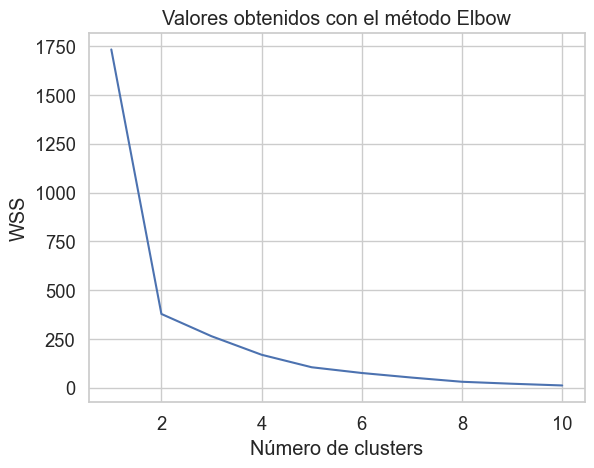

In [40]:
wcss = []  # creamos una lista para almacenar los valores que nos devuelva el modelo con cada grupo de nodos
for i in range(1,11):  # probamos el modelo con con un nodo y vamos aumentando hasta 10 nodos
    kmeans = KMeans(n_clusters=i, random_state= 0)  
    kmeans.fit(df_PCA)  
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)  
plt.title('Valores obtenidos con el método Elbow')  
plt.xlabel('Número de clusters')  
plt.ylabel('WSS');

#### Con la gráfica que obtenemos tomamos un número de clusters de cinco.

#### Algoritmo K-Means con 5 clusters.

In [41]:
clustering_5 = KMeans(n_clusters=5, random_state=0)
clustering_5.fit(df_PCA)

KMeans(n_clusters=5, random_state=0)

In [42]:
y_pred_5 = clustering_5.fit_predict(df_PCA)
df_F_TLD['cluster_KMeans_5'] = y_pred_5  # aquí tenemos nuestro dataframe con los grupos para poder representarlo gráficamente

### Exercici 2
#### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

Los algotirmos de agrupamiento jerárquico agrupan objetos en grupos llamados clusters, pueden ser de dos tipos:  
        - Aglomerativos: inicialmente hay muchos clústeres pequeños, se mezclan y crean un grupo mayor en jerarquía.  
        - Divisivas: la primera observación es un sólo grupo, se van realizando divisiones y estos grupos bajan en la jerarquía.  
Los algoritmos de agrupamiento jerárquico no necesitan un número dado de clusters y son lentos con grandes volúmenes de datos.  
Los algoritmos de agrupamiento jerárquico teienen diferetes métodos de medir las distancias. En este jercicico usaremos el método Ward, la distancias entre clústeres es la suma del cuadrado de las diferencias dentro de todos los clústeres.

In [43]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

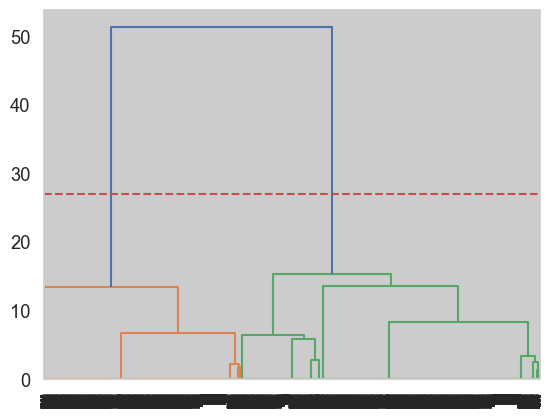

In [44]:
dendrogram = sch.dendrogram(sch.linkage(df_PCA, method='ward'))
plt.axhline(y = 27, color = 'r', linestyle = '--');

La mayor distancia entre muestras en el dendograma está marcada con una línea roja discontinua. Esta línea cruza dos líneas del dendograma, por tanto nuestros clústeres serán dos.

In [45]:
clustering_agg_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_agg_2.fit(df_PCA)
labels_2 = clustering_agg_2.labels_
df_F_TLD['cluster_jer_2'] = labels_2

### Exercici 3
#### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

El índice de rendimiento Silhouette se usa para evaluar la calidad de los clústeres obtenidos con los algoritmos de agrupación.  
Se calcula la distancia entre cada muestra y todos los demás puntos de cada cluster, después se calcula media y se obtiene la distancia media.  
El valor del índice Silhouette está entre -1 y 1. El cluster es denso y está bien diferenciado cuando el índice se acerca a 1, si se acerca a 0 hay clústeres sobrepuestos y las muestras están muy cerca de los límites con otros clústeres. Si el valor es -1 indica que hay muestras asignadas a clústeres incorrectos.

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestCentroid

#### Calculamos el rendimiento del clustering hecho con KMeans.

Silhouetter Score 2 clusters: 0.716
Silhouetter Score 3 clusters: 0.674
Silhouetter Score 4 clusters: 0.710
Silhouetter Score 5 clusters: 0.809
Silhouetter Score 6 clusters: 0.851
Silhouetter Score 7 clusters: 0.902
Silhouetter Score 8 clusters: 0.930
Silhouetter Score 9 clusters: 0.955


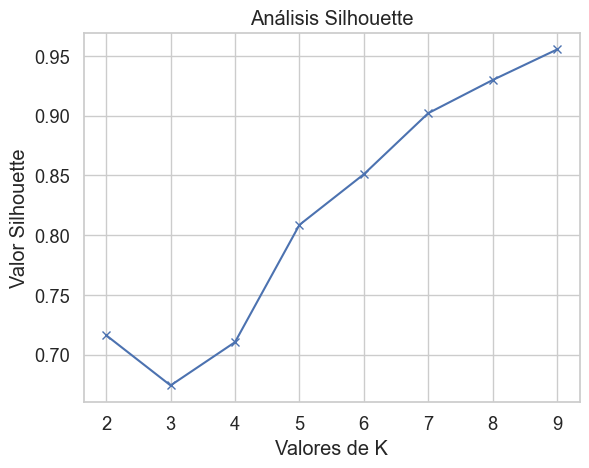

In [47]:
rango_k_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in rango_k_clusters:
 
 kmeans = KMeans(n_clusters=num_clusters, random_state=0)
 kmeans.fit(df_PCA)
 cluster_labels = kmeans.labels_
 
 silhouette_avg.append(silhouette_score(df_PCA, cluster_labels, metric='euclidean'))
 print(f'Silhouetter Score {num_clusters} clusters: %.3f' % silhouette_avg[num_clusters-2])

plt.plot(rango_k_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Valor Silhouette') 
plt.title('Análisis Silhouette');

#### Representación gráfica de los clústeres con Silhouette.

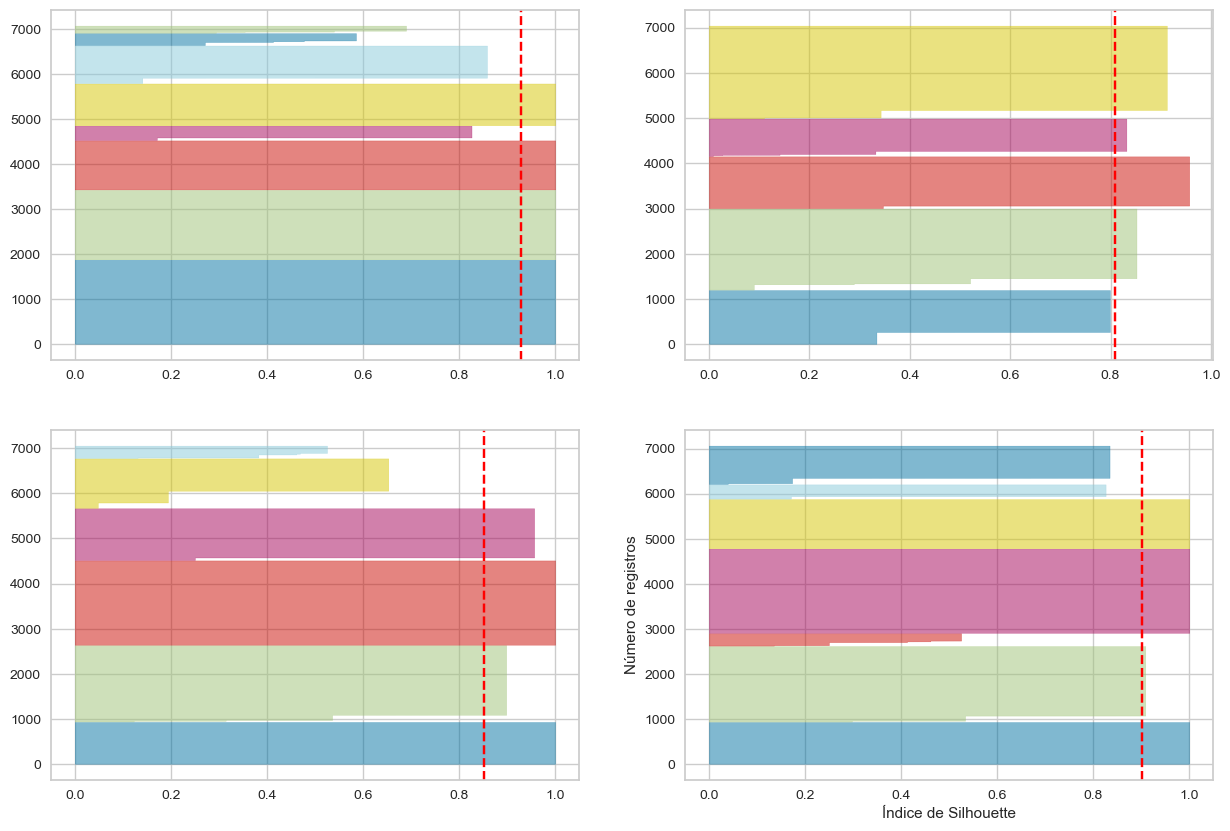

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in [5,6,7,8]:  # número de clusters
    plt.xlabel('Índice de Silhouette')
    plt.ylabel('Número de registros')
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-4][mod])
    visualizer.fit(df_PCA)

Observamos en las gráficas que la única distribución que tiene los volúmenes de los clústeres equilibrados y que todos llegan al score marcado es la distribución de cinco clústeres a pesar de tener el menor score. Coindide además con el número obtenido con el método Elbow, así que trabajaremos con cinco clústeres.

#### Calculamos el rendimiento de la agrupación hecha con AgglomerativeClustering.

Silhouetter Score 2 clusters: 0.697
Silhouetter Score 3 clusters: 0.607
Silhouetter Score 4 clusters: 0.722
Silhouetter Score 5 clusters: 0.800
Silhouetter Score 6 clusters: 0.847
Silhouetter Score 7 clusters: 0.876
Silhouetter Score 8 clusters: 0.929
Silhouetter Score 9 clusters: 0.961


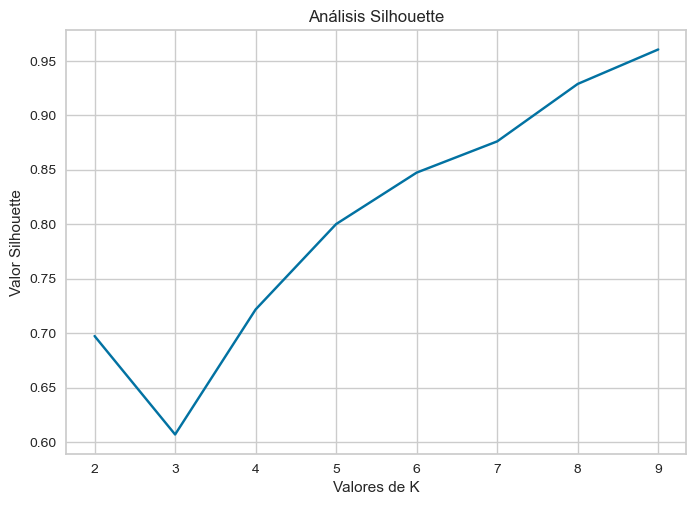

In [49]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
    cluster_agg_n = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    cluster_agg_n.fit(df_PCA)
    cluster_labels = cluster_agg_n.labels_
  
    silhouette_avg.append(silhouette_score(df_PCA, cluster_labels, metric='euclidean'))
    print(f'Silhouetter Score {num_clusters} clusters: %.3f' % silhouette_avg[num_clusters-2])
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Valor Silhouette') 
plt.title('Análisis Silhouette');

#### Trasformamos la variable númerica ordinal 'cluster_KMeans_5' a categórica para facilitarnos las gráficas.

In [50]:
df_F_TLD['cluster'] = df_F_TLD['cluster_KMeans_5'].map({0:'cluster_1', 1:'cluster_2', 2:'cluster_3', 3:'cluster_4', 4:'cluster_5'})

### Análisis de los datos y conclusiones con los clusteres definitivos.

#### Distribución de registros por clústeres.

In [51]:
df_F_TLD['cluster'].value_counts()

cluster_5    2046
cluster_2    1793
cluster_1    1189
cluster_3    1144
cluster_4     825
Name: cluster, dtype: int64

#### El algoritmo K-Means ha clasificado los registros en cinco clúteres de volúmenes parecidos, el mayor contiene 2046 registros y el menor 825.

#### Distribución de tipos de interacción por cluster.

In [52]:
df_F_TLD.groupby(by='cluster')['status_type'].value_counts()

cluster    status_type
cluster_1  video          1189
cluster_2  photo          1660
           status          113
           link             20
cluster_3  video          1144
cluster_4  photo           715
           status           84
           link             26
cluster_5  photo          1867
           status          162
           link             17
Name: status_type, dtype: int64

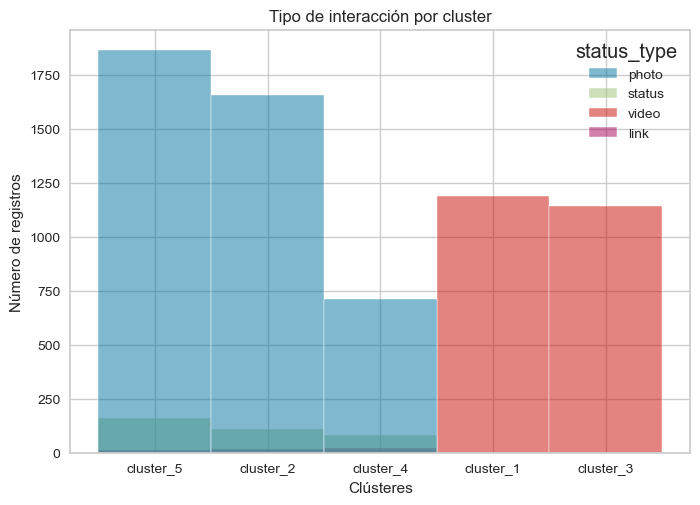

In [53]:
sns.histplot(x=df_F_TLD['cluster'], hue=df_F_TLD['status_type'])
plt.xlabel('Clústeres')
plt.ylabel('Número de registros')
plt.title('Tipo de interacción por cluster');

Los clúteres se dividen claramente en cluster de foto, tres de ellos, y cluster de vídeo, los otros dos.

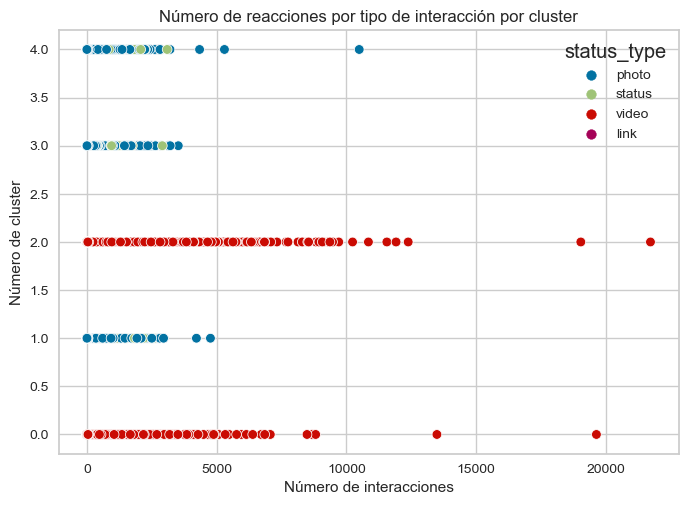

In [54]:
sns.scatterplot(df_F_TLD['num_interacciones'],df_F_TLD['cluster_KMeans_5'], hue = df_F_TLD['status_type'])
plt.xlabel('Número de interacciones')
plt.ylabel('Número de cluster')
plt.title('Número de reacciones por tipo de interacción por cluster');

Podemos ver que el cluster número tres (2 en la gráfica), de vídeo, tiene muchas más interacciones que el resto de clúteres, seguido por el número 1 (0 en la gráfica), también de vídeo.

In [55]:
df_F_TLD.groupby(by='part_day')['status_type'].value_counts()

part_day          status_type
Madrugada 00-06h  photo          1867
                  video           927
                  status          162
                  link             17
Manaña 06-12h     photo          1542
                  video          1089
                  status          113
                  link             20
Noche 20-00h      photo           715
                  video           262
                  status           68
                  link             17
Tarde 12-20h      photo           118
                  video            55
                  status           16
                  link              9
Name: status_type, dtype: int64

In [56]:
df_F_TLD.groupby(by='cluster')['part_day'].value_counts()

cluster    part_day        
cluster_1  Madrugada 00-06h     927
           Noche 20-00h         262
cluster_2  Manaña 06-12h       1675
           Tarde 12-20h         118
cluster_3  Manaña 06-12h       1089
           Tarde 12-20h          55
cluster_4  Noche 20-00h         800
           Tarde 12-20h          25
cluster_5  Madrugada 00-06h    2046
Name: part_day, dtype: int64

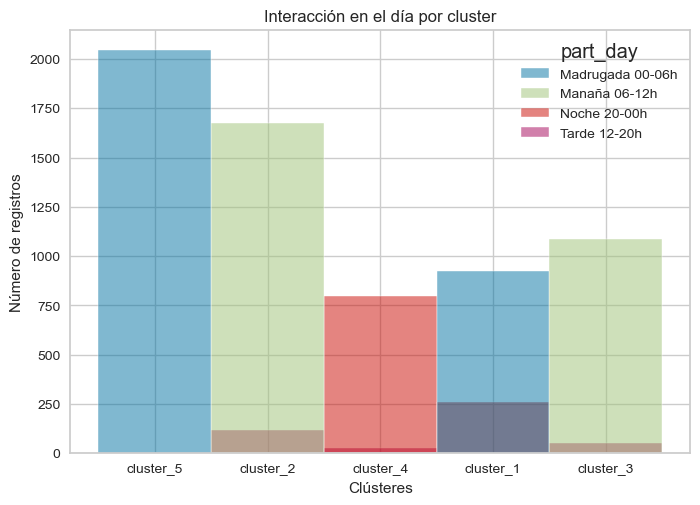

In [57]:
sns.histplot(x=df_F_TLD['cluster'], hue=df_F_TLD['part_day'])
plt.xlabel('Clústeres')
plt.ylabel('Número de registros')
plt.title('Interacción en el día por cluster');

En la gráfica se ve cómo cada cluster tiene predominancia en una parte del día. Tenemos dos clústeres mayoritariamente de madrugada, dos de mañana y un quinto de noche.

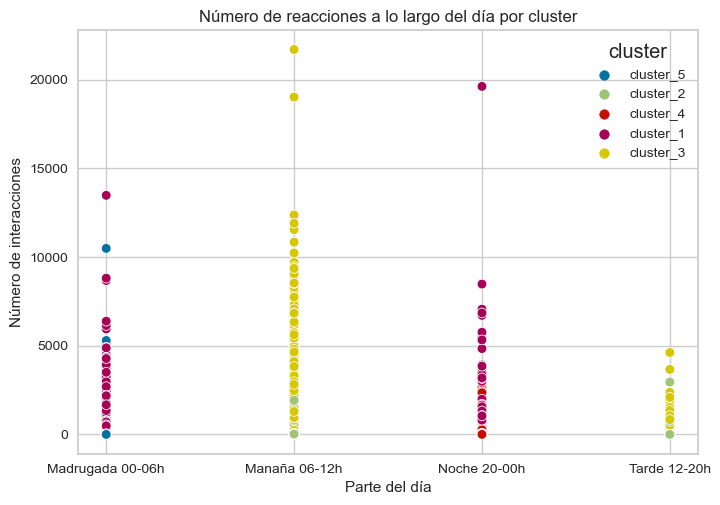

In [58]:
sns.scatterplot(df_F_TLD['part_day'],df_F_TLD['num_interacciones'], hue = df_F_TLD['cluster'])
plt.xlabel('Parte del día')
plt.ylabel('Número de interacciones')
plt.title('Número de reacciones a lo largo del día por cluster');

Observamos que el cluster 3,es el que tiene más interacciones por la mañana y a la vez el que menos tiene por la tarde, junto con el cluster 2 que es de tarde también.

### Conclusiones.  
#### Los cinco clústeres generados por el aloritmo K-Means tienen las siguientes caracteríaticas:  
    - Cluster 1, tiene 1189 registros de usuarios que han compartido vídeos, 927 durante la madrugada y 262 por la noche.  
    - Cluster 2, tiene 1793 registros de usuarios que han compartido fotos, 1660, status, 113, link 20, durante la mañana, 1675 y la tarde 118.
    - Cluster 3, tiene 1144 registros de usuarios que han compartido vídeos, 1089 durante la mañana y 55 por la tarde.  
    - Cluster 4, tiene 825 registros de usuarios que han compartido fotos, 715, status, 84, link 26, durante la noche, 800 y la tarde 25.
    - Cluster 5, tiene 2046 registros de usuarios que han compartido fotos, 1867, status, 162, link 17, durante la madrugada.

#### Renombramos los clústeres con sus características.

In [59]:
df_F_TLD['cluster'] = df_F_TLD['cluster_KMeans_5'].map({0:'cluster_1, vídeos-madrugada-noche', 1:'cluster_2, fotos-mañana-tarde', 2:'cluster_3, vídeos-mañana', 3:'cluster_4, fotos-noche', 4:'cluster_5, fotos-madrugada'})

In [60]:
df_F_TLD['cluster'].unique()

array(['cluster_5, fotos-madrugada', 'cluster_2, fotos-mañana-tarde',
       'cluster_4, fotos-noche', 'cluster_1, vídeos-madrugada-noche',
       'cluster_3, vídeos-mañana'], dtype=object)

#### Actividades de nuestros registros según los clústeres.

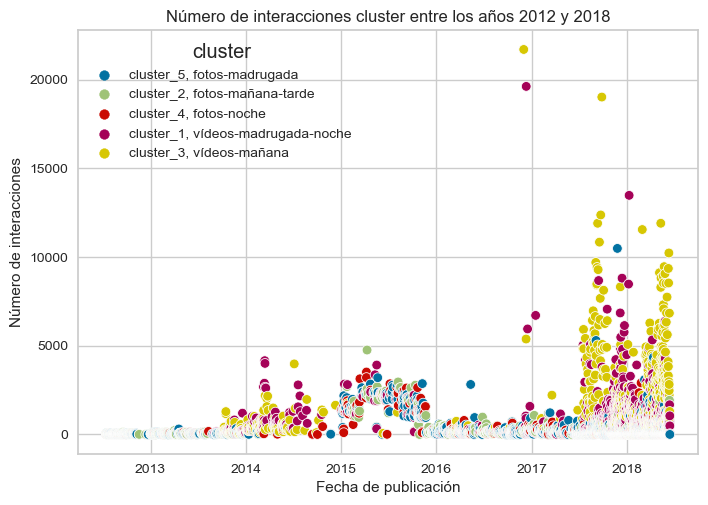

In [61]:
sns.scatterplot(df_F_TLD['publication_date'],df_F_TLD['num_interacciones'], hue = df_F_TLD['cluster'])
plt.xlabel('Fecha de publicación')
plt.ylabel('Número de interacciones')
plt.title('Número de interacciones cluster entre los años 2012 y 2018');

#### Facebook refleja con la viralidad en las fotos y vídeos los eventos más importantes, como eventos polítivos o atentados.  
#### Podemos ver el la gráfica:  
    - el golpe de estado de 2014, 
    https://es.wikipedia.org/wiki/Golpe_de_Estado_en_Tailandia_de_2014
    - atentado en 2015, 
    https://www.dw.com/es/tailandia-en-estado-de-shock/a-18656389
    - nueva constitución en el 2017,
    https://www.dw.com/es/nueva-constituci%C3%B3n-en-tailandia-y-v%C3%ADa-libre-para-elecciones/a-38322205
    - elecciones en 2018,  
    https://www.rtve.es/noticias/20171010/tailandia-celebrara-elecciones-noviembre-2018/1627467.shtml
#### Observamos que los clústeres que mejor recogen esta viralidad son el número 1, vídeos durante la noche o madrugada y el número 3, vídeos por la mañana.